**Principal Component Analysis (PCA) is a dimensionality reduction technique that:
Converts possibly correlated features into a set of linearly uncorrelated components.These new variables (called principal components) capture the most variance in the data.**


In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 2D dataset
X = np.array([
    [2.5, 2.4],
    [0.5, 0.5],
    [2.2, 2.9],
    [1.9, 2.2],
    [3.1, 3.0],
    [2.3, 2.7],
    [2, 1.6],
    [1, 1.1],
    [1.5, 1.6],
    [1.1, 0.8]
])


In [20]:
# Step 2: Standardize
X_meaned = X - np.mean(X, axis=0)


In [21]:
# Step 3: Covariance matrix
cov_mat = np.cov(X_meaned, rowvar=False)


In [22]:
# Step 4: Eigen decomposition
eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)


In [23]:
# Step 5: Sort
sorted_index = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[sorted_index]
eigen_vectors = eigen_vectors[:, sorted_index]


In [24]:
# Step 6: Choose top k eigenvectors
k = 1
eigenvector_subset = eigen_vectors[:, :k]


In [25]:
# Step 7: Transform
X_reduced = np.dot(X_meaned, eigenvector_subset)


In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_sklearn = pca.fit_transform(X)


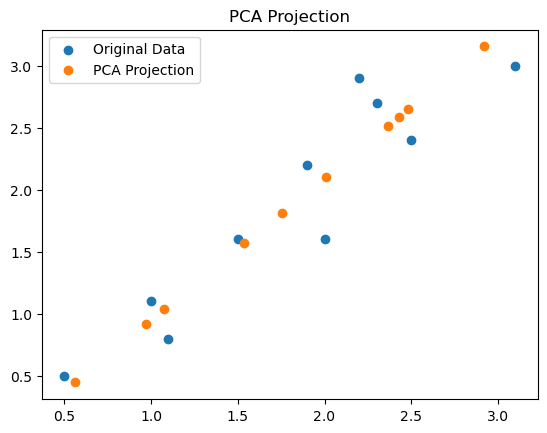

In [27]:
# Plot original
plt.scatter(X[:, 0], X[:, 1], label='Original Data')

# Project back to 2D space (for visualization)
X_projected_back = np.dot(X_reduced, eigenvector_subset.T) + np.mean(X, axis=0)
plt.scatter(X_projected_back[:, 0], X_projected_back[:, 1], label='PCA Projection')

plt.legend()
plt.title("PCA Projection")
plt.show()



| Step | Component                              | Meaning                                |
| ---- | -------------------------------------- | -------------------------------------- |
| 1    | `X - np.mean(X, axis=0)`               | Center the data (mean 0)               |
| 2    | `np.cov(X_meaned, rowvar=False)`       | Covariance matrix                      |
| 3    | `np.linalg.eigh(cov_mat)`              | Get eigenvalues and eigenvectors       |
| 4    | `np.argsort(...)`                      | Sort eigenvalues/vectors by importance |
| 5    | `eigen_vectors[:, :k]`                 | Select top k eigenvectors              |
| 6    | `np.dot(X_meaned, eigenvector_subset)` | Project data onto new axes             |
